Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\monik\tensorflow_datasets\cats_vs_dogs\4.0.0.incompleteJACN9C\cats_vs_dogs-train.tfrecord*.…

Dataset cats_vs_dogs downloaded and prepared to C:\Users\monik\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


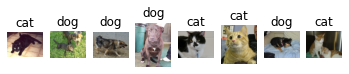

In [3]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

classNames = ['cat', 'dog']
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

i = 0
fig, ax = plt.subplots(1, 8)
for image, label in testDataset.take(8):
    ax[i].axis('off')
    ax[i].set_title(classNames[label])
    ax[i].imshow(image)
    i += 1

plt.show()

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as plt


def preprocess(img, label):
    return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label


HEIGHT = 200
WIDTH = 200
split = ['train[:70%]', 'train[70%:]']

trainDataset, testDataset = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)

trainDataset = trainDataset.map(preprocess).batch(32)
testDataset = testDataset.map(preprocess).batch(32)

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

509/509 [==============================] - 274s 537ms/step - loss: 0.1384 - accuracy: 0.9467 - val_loss: 0.8225 - val_accuracy: 0.7639


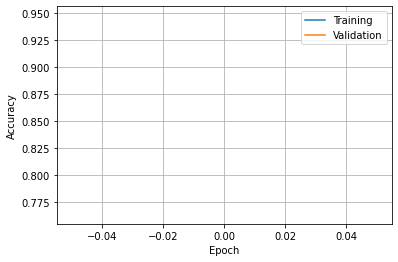

In [8]:
trainHistory = model.fit(trainDataset, epochs=1, validation_data=testDataset)

plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

In [9]:
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

219/219 [==============================] - 20s 91ms/step - loss: 0.8225 - accuracy: 0.7639
0.8224804997444153
0.7638630270957947
